In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
#Importamos nuestros módulos y clases necesarias
import Image_Classifier as img_clf
import Labeled_Image as li
import classifiers as clfs

In [2]:
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rescale

img1 = io.imread("..\\rsc\\img\\my_face.jpg")
img2 = io.imread("..\\rsc\\img\\faces_test.jpg")
img3 = io.imread("..\\rsc\\img\\family.jpg")
img4 = io.imread("..\\rsc\\img\\rotated_family.jpg")

imgs = {'0': img1, '1': img2,'2': img3}
rescale_list = {'0': 0.3, '1': 0.65, '2': 0.5, '3': 0.5}

# Convertimos imagen a escala de grises
for index in imgs:
    imgs[index] = rgb2gray(imgs[index])
    imgs[index] = rescale(imgs[index], rescale_list[index])

# Rotamos la ultima imagen 90 grados
img4 = rgb2gray(img4)
img4 = rescale(img4, 0.5)
imgs['3'] = img4

In [3]:
def set_classifier_wrapper(classifier_index):
    clf.set_classifier(clfs.classifiers[classifier_index][0],
                       is_probs_classifier = clfs.classifiers[classifier_index][1])

def image_to_classify(lbl_img,image_index):
    # Inicializamos la clase Wrapper para nuestra imagen, que contendra
    # toda la información necesaria sobre esa imagen
    image = imgs[image_index+'']
    lbl_img.set_image(image)
    
def plotter_wrapper(probs):
    lbl_img.boxes_generator_with_nms(probs)
    lbl_img.plotter()

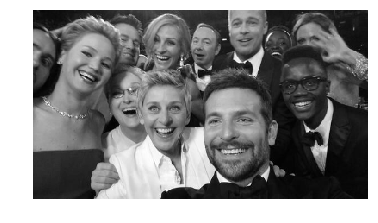

In [4]:
# Inicializamos la clase que se encarga de clasificar imagenes 
clf = img_clf.Image_Classifier(clfs.classifiers.get('svm'),62,47)
lbl_img = li.Labeled_Image(clf)

# Mostramos el widget que permita elegir el clasificador
interact_manual(set_classifier_wrapper, classifier_index = list(clfs.classifiers.keys()));

# Mostramos el widget que permita elegir la imagen a clasificar
interact_manual(image_to_classify, image_index = list(imgs.keys()), lbl_img=fixed(lbl_img));

# Por ultimo, mostramos la imagen y permitimos que muestre las ventanas 
# en función de las probabilidades
interact_manual(plotter_wrapper, probs=(0.5,1,0.001))